# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_df = pd.DataFrame({"City": cities})
weather_df

,City
0,yokadouma
1,kapaa
2,ust-kamchatsk
3,nelson bay
4,cayenne
...,...
602,anchorage
603,tecoanapa
604,ocala
605,maua


In [4]:
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,yokadouma,,,,,,,,
1,kapaa,,,,,,,,
2,ust-kamchatsk,,,,,,,,
3,nelson bay,,,,,,,,
4,cayenne,,,,,,,,


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


parameters = {"units": units,
             "appid": weather_api_key}

print("Beginning Data Retrieval")
print("-----------------------------")

for index, row in weather_df.iterrows():
    parameters["q"] = row["City"]
    response = requests.get(url, params=parameters).json()
    
    try:        
        weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index, "Country"] = response["sys"]["country"]
        weather_df.loc[index, "Date"] = response["dt"]
        weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        weather_df.loc[index, "Lat"] = response["coord"]["lat"]
        weather_df.loc[index, "Lng"] = response["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        
        print(f"Processing Record {index} | {row['City']}")
              
    except (KeyError, IndexError):
              print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | yokadouma
Processing Record 1 | kapaa
City not found. Skipping...
Processing Record 3 | nelson bay
Processing Record 4 | cayenne
Processing Record 5 | upernavik
Processing Record 6 | sistranda
Processing Record 7 | kudahuvadhoo
City not found. Skipping...
Processing Record 9 | bredasdorp
Processing Record 10 | geraldton
City not found. Skipping...
Processing Record 12 | saint george
Processing Record 13 | busselton
Processing Record 14 | sibolga
Processing Record 15 | chokurdakh
Processing Record 16 | coihaique
Processing Record 17 | bengkulu
Processing Record 18 | baykit
Processing Record 19 | hobart
City not found. Skipping...
Processing Record 21 | ushuaia
Processing Record 22 | chiredzi
Processing Record 23 | bay roberts
Processing Record 24 | port blair
Processing Record 25 | abu samrah
Processing Record 26 | marsh harbour
Processing Record 27 | avarua
Processing Record 28 | mataura
Processing Record 29 |

Processing Record 250 | nanortalik
City not found. Skipping...
Processing Record 252 | richards bay
Processing Record 253 | troitskoye
Processing Record 254 | rawson
Processing Record 255 | balud
Processing Record 256 | borgarnes
Processing Record 257 | hithadhoo
Processing Record 258 | zapolyarnyy
City not found. Skipping...
Processing Record 260 | punta alta
Processing Record 261 | kargasok
Processing Record 262 | lagoa
Processing Record 263 | sobolevo
Processing Record 264 | buala
Processing Record 265 | tuatapere
Processing Record 266 | nabire
Processing Record 267 | tsiroanomandidy
Processing Record 268 | saldanha
Processing Record 269 | mabaruma
Processing Record 270 | palmerston
Processing Record 271 | mengcheng
Processing Record 272 | mahon
Processing Record 273 | grand gaube
Processing Record 274 | longyan
Processing Record 275 | zhigansk
City not found. Skipping...
Processing Record 277 | smithers
City not found. Skipping...
Processing Record 279 | aragarcas
Processing Record

Processing Record 501 | bayonet point
Processing Record 502 | leh
City not found. Skipping...
Processing Record 504 | fukue
Processing Record 505 | catamarca
Processing Record 506 | flinders
Processing Record 507 | maceio
Processing Record 508 | hirara
Processing Record 509 | khani
Processing Record 510 | morro bay
Processing Record 511 | bonavista
Processing Record 512 | yar-sale
Processing Record 513 | leshukonskoye
Processing Record 514 | port hedland
Processing Record 515 | north platte
Processing Record 516 | tawang
Processing Record 517 | vestmanna
Processing Record 518 | sohagpur
Processing Record 519 | grand-santi
Processing Record 520 | ishigaki
Processing Record 521 | mulege
Processing Record 522 | muli
Processing Record 523 | lodja
Processing Record 524 | andenes
Processing Record 525 | cockburn town
Processing Record 526 | atambua
Processing Record 527 | lazurne
Processing Record 528 | svetlogorsk
Processing Record 529 | nadym
Processing Record 530 | vanimo
Processing Recor

In [6]:
weather_df.replace("", "NaN", inplace=True)

weather_df["Cloudiness"] = weather_df["Cloudiness"].astype(float)
weather_df["Date"] = weather_df["Date"].astype(float)
weather_df["Humidity"] = weather_df["Humidity"].astype(float)
weather_df["Lat"] = weather_df["Lat"].astype(float)
weather_df["Lng"] = weather_df["Lng"].astype(float)
weather_df["Max Temp"] = weather_df["Max Temp"].astype(float)
weather_df["Wind Speed"] = weather_df["Wind Speed"].astype(float)

weather_df.dropna(inplace=True)

weather_df["Cloudiness"] = weather_df["Cloudiness"].astype(int)
weather_df["Humidity"] = weather_df["Humidity"].astype(int)

weather_df.reset_index(drop=True, inplace=True)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [8]:
weather_df.to_csv("Cities.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,yokadouma,69,CM,1.586051e+09,79,3.52,15.05,69.75,2.13
1,kapaa,75,US,1.586051e+09,78,22.08,-159.32,80.60,11.41
2,nelson bay,0,AU,1.586051e+09,40,-32.72,152.15,73.99,17.22
3,cayenne,40,GF,1.586051e+09,78,4.93,-52.33,80.60,8.05
4,upernavik,0,GL,1.586051e+09,79,72.79,-56.15,9.70,9.55


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
date = weather_df.loc[0, ["Date"]]
date2 = time.gmtime(date)
date3 = f"({date2[1]}/{date2[2]}/{date2[0]})"

#### Latitude vs. Temperature Plot

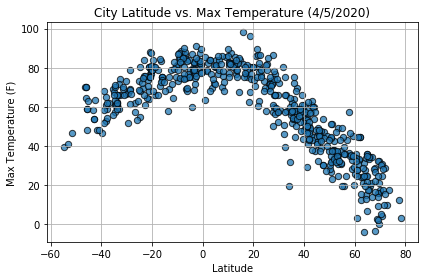

In [10]:
weather_df.plot(kind="scatter", x="Lat", y="Max Temp", title = f"City Latitude vs. Max Temperature {date3}",
                edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

plt.savefig("fig1.png")

#### Latitude vs. Humidity Plot

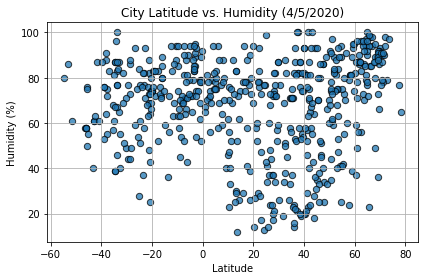

In [11]:
weather_df.plot(kind="scatter", x="Lat", y="Humidity", title=f"City Latitude vs. Humidity {date3}",
               edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

plt.savefig("fig2.png")

#### Latitude vs. Cloudiness Plot

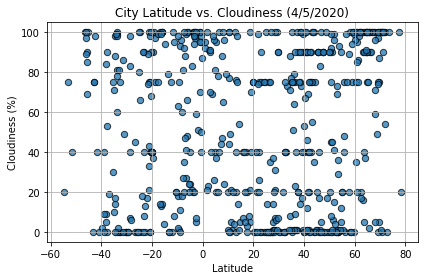

In [12]:
weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", title=f"City Latitude vs. Cloudiness {date3}",
               edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()

plt.savefig("fig3.png")

#### Latitude vs. Wind Speed Plot

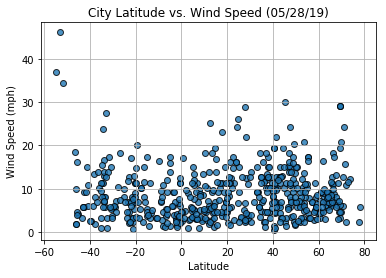

In [48]:
weather_df.plot(kind="scatter", x="Lat", y="Wind Speed", title=f"City Latitude vs. Wind Speed {date3}",
               edgecolor="black", s=40, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.tight_layout()

plt.savefig("fig4.png")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


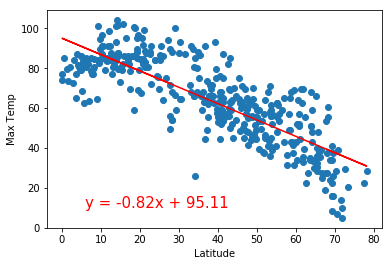

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


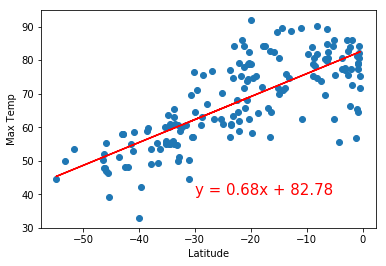

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


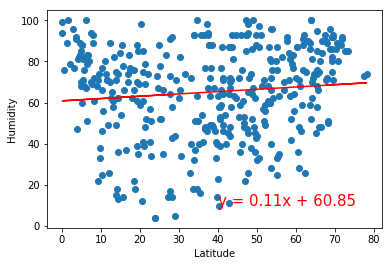

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


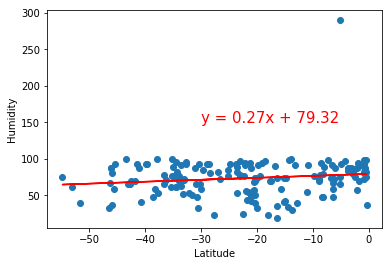

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


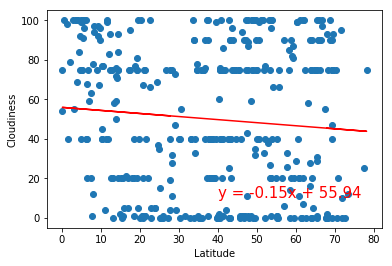

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


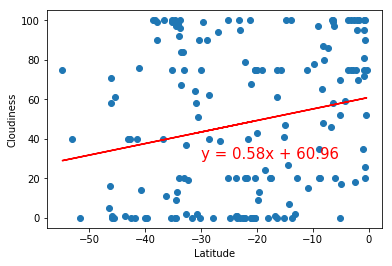

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


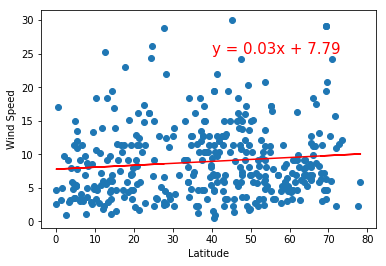

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


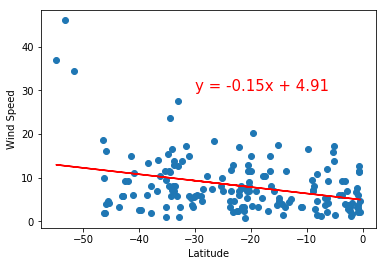